<a href="https://colab.research.google.com/github/Harit0710/Machine-learning/blob/main/EDA_nd_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA - exploratory data analysis

In [8]:
# --- Step 1: Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For pretty plots
sns.set(style="whitegrid")

# --- Step 2: Load Dataset ---
# (replace with your actual file path, e.g. "loan_data.csv")
df = pd.read_csv("Bank_Loan.csv")

import warnings
warnings.filterwarnings("ignore")


In [9]:
# Quick look at data
print(df.shape)     # Rows, Columns
print(df.head())      # First 5 rows
print(df.info())      # Data types, nulls


(5000, 14)
   ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
0   1   25           1      49     91108       4  1/60          1         0   
1   2   45          19      34     90089       3  1/50          1         0   
2   3   39          15      11     94720       1  1/00          1         0   
3   4   35           9     100     94112       1  2/70          2         0   
4   5   35           8      45     91330       4  1/00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (

In [10]:
# --- Step 3: Target Variable Distribution ---
loan_counts = df['Personal Loan'].value_counts()

print("\nLoan Acceptance Distribution:")
print(loan_counts)


Loan Acceptance Distribution:
Personal Loan
0    4520
1     480
Name: count, dtype: int64


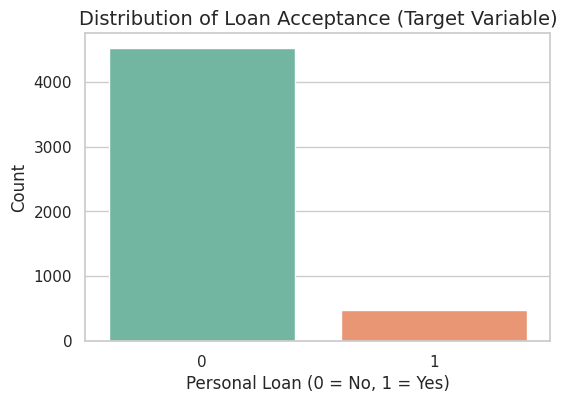


Loan Acceptance Percentage:
Personal Loan
0    90.4
1     9.6
Name: count, dtype: float64


In [11]:
# --- Step 4: Plot Target Variable ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Personal Loan', palette="Set2")
plt.title("Distribution of Loan Acceptance (Target Variable)", fontsize=14)
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Percentage distribution
loan_percentage = loan_counts / len(df) * 100
print("\nLoan Acceptance Percentage:")
print(loan_percentage)

In [12]:
# --- Step 2: Cleanup ---

# Drop irrelevant columns
df = df.drop(['ID'], axis=1)

# Check missing values
print("Missing values in each column:\n", df.isnull().sum())

# Check for negative experience
print("\nExperience column - unique min/max:")
print("Min:", df['Experience'].min(), "Max:", df['Experience'].max())

# Basic summary of numeric features
print("\nSummary statistics:")
print(df.describe())

Missing values in each column:
 Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Experience column - unique min/max:
Min: -3 Max: 43

Summary statistics:
               Age   Experience       Income      ZIP Code       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200  93152.503200     2.396400   
std      11.463166    11.467954    46.033729   2121.852005     1.147663   
min      23.000000    -3.000000     8.000000   9307.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000

In [13]:
# (Alternative: replace with median) because experience can't be negative !!
df["Experience"] = df["Experience"].apply(lambda x: df["Experience"].median() if x < 0 else x)

In [14]:
# Check for negative experience again
print("\nExperience column - unique min/max:")
print("Min:", df['Experience'].min(), "Max:", df['Experience'].max())


Experience column - unique min/max:
Min: 0.0 Max: 43.0


#Univariate Analysis

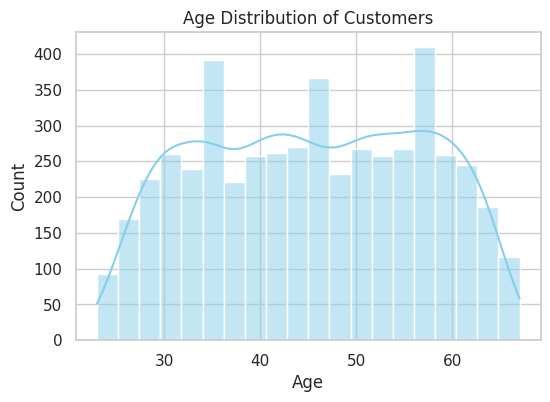

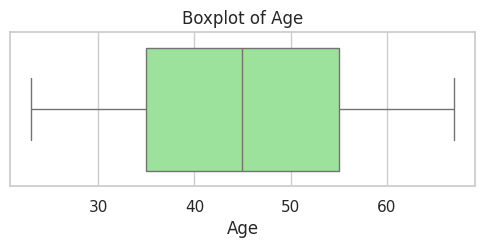

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram with KDE for AGE
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Boxplot
plt.figure(figsize=(6,2))
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title("Boxplot of Age")
plt.show()


Next up ->

Histogram + KDE → shows if income is skewed (expect long right tail).

Boxplot → lets us visually compare typical income ranges of loan acceptors vs non-acceptors.

Mean table → exact numbers of average income for both groups.

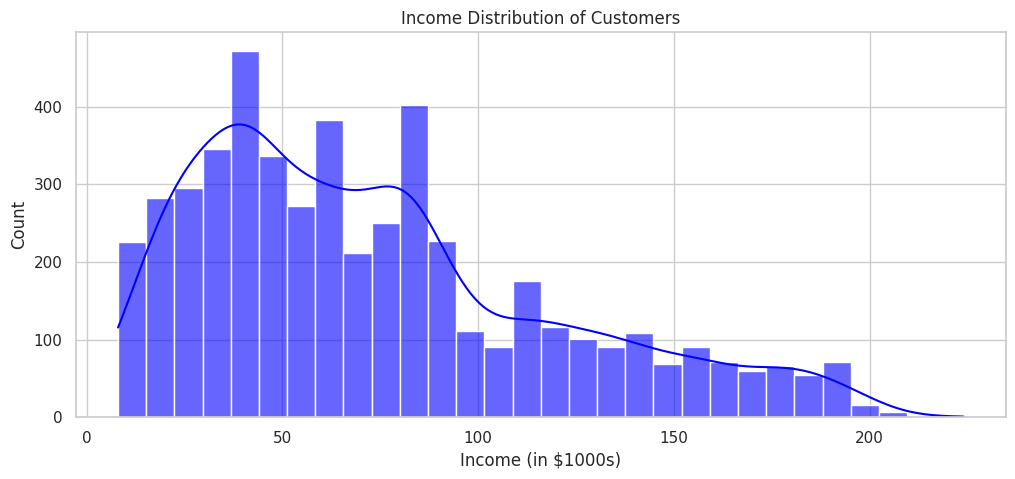

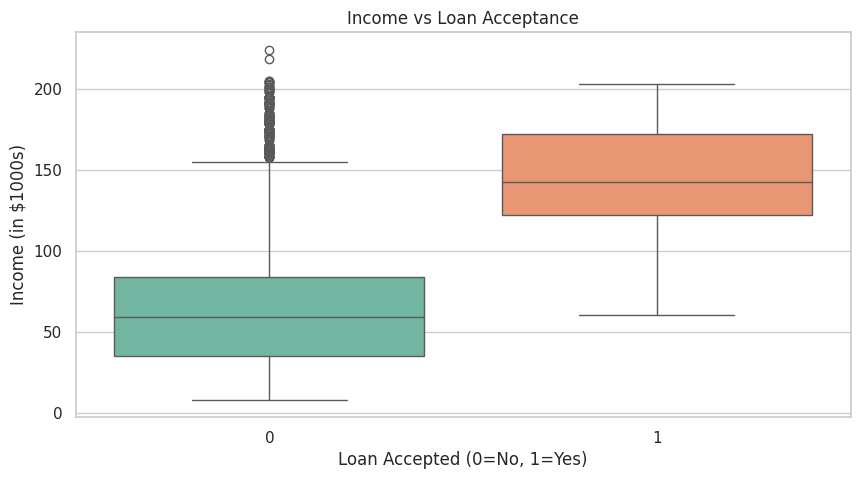

Average Income (by Loan Acceptance):
 Personal Loan
0     66.237389
1    144.745833
Name: Income, dtype: float64


In [17]:
# Income Distribution & Relationship with Loan Acceptance

# Distribution plot
plt.figure(figsize=(12,5))
sns.histplot(df['Income'], bins=30, kde=True, color='blue', alpha=0.6)
plt.title("Income Distribution of Customers")
plt.xlabel("Income (in $1000s)")
plt.ylabel("Count")
plt.show()

# Boxplot of Income vs Loan Acceptance
plt.figure(figsize=(10,5))
sns.boxplot(x='Personal Loan', y='Income', data=df, palette="Set2")
plt.title("Income vs Loan Acceptance")
plt.xlabel("Loan Accepted (0=No, 1=Yes)")
plt.ylabel("Income (in $1000s)")
plt.show()

# Mean Income by Loan Status
loan_income_summary = df.groupby('Personal Loan')['Income'].mean()
print("Average Income (by Loan Acceptance):\n", loan_income_summary)


Loan Acceptance Rate (%) by Income Range:
 Income_bin
(0, 50]        0.000000
(50, 100]      2.241195
(100, 150]    28.571429
(150, 200]    50.469484
(200, 250]    18.750000
Name: Personal Loan, dtype: float64


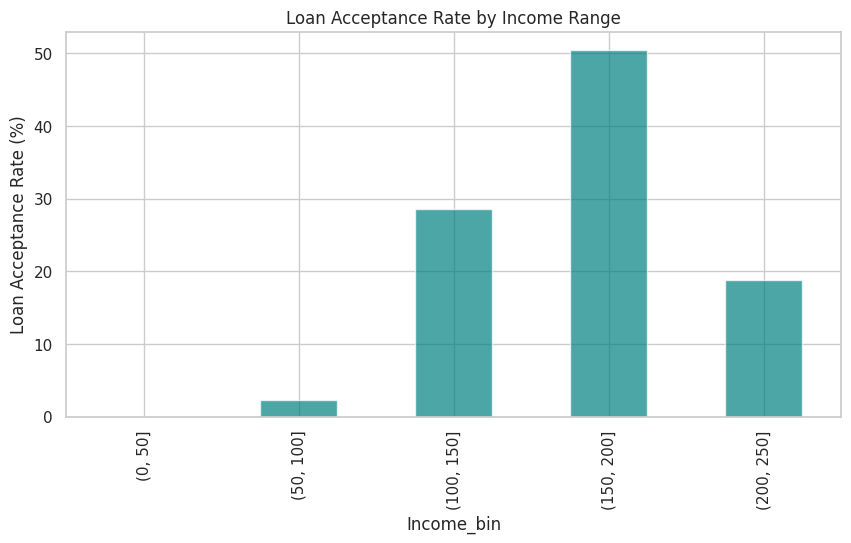

In [18]:
# Probability of Loan Acceptance by Income Range
df['Income_bin'] = pd.cut(df['Income'], bins=[0,50,100,150,200,250])
acceptance_rates = df.groupby('Income_bin')['Personal Loan'].mean() * 100

print("Loan Acceptance Rate (%) by Income Range:\n", acceptance_rates)

# Plot acceptance probability by income
plt.figure(figsize=(10,5))
acceptance_rates.plot(kind='bar', color='teal', alpha=0.7)
plt.ylabel("Loan Acceptance Rate (%)")
plt.title("Loan Acceptance Rate by Income Range")
plt.show()


👉 This will tell you:

For income <50k, maybe <1% accept.

For 100k–150k, acceptance jumps significantly.

For >150k, probably 50%+ acceptance.

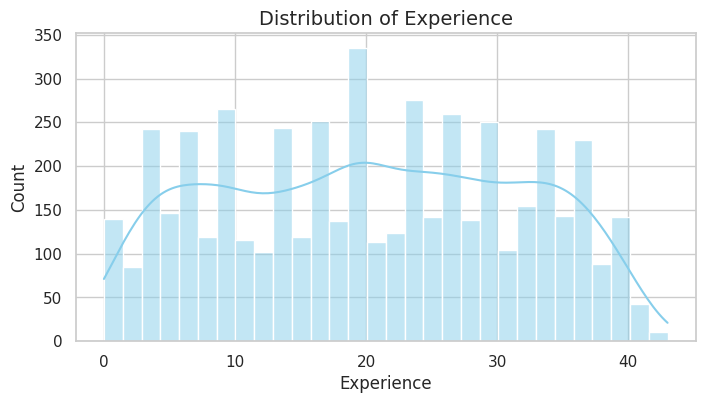

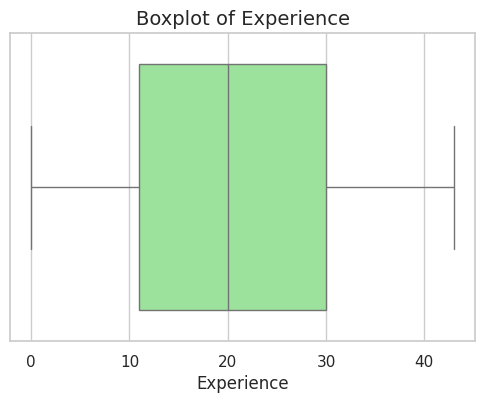

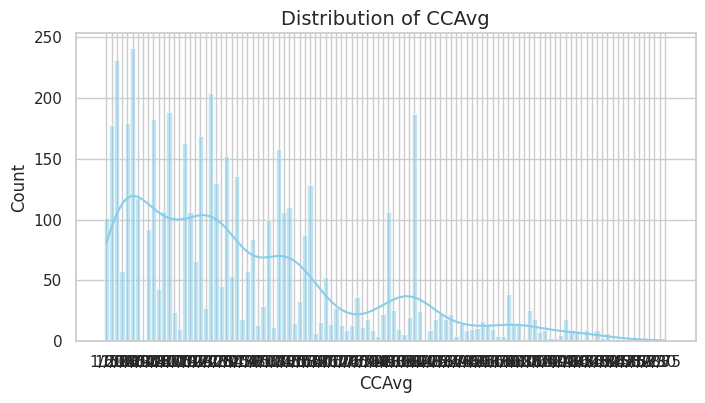

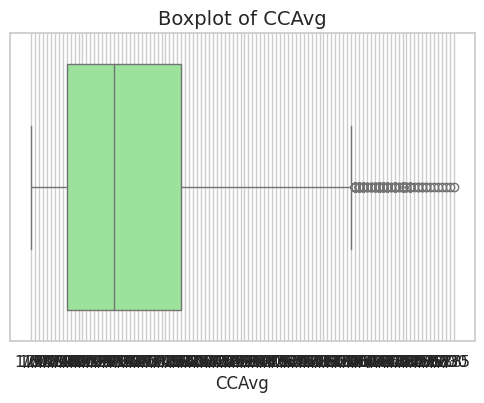

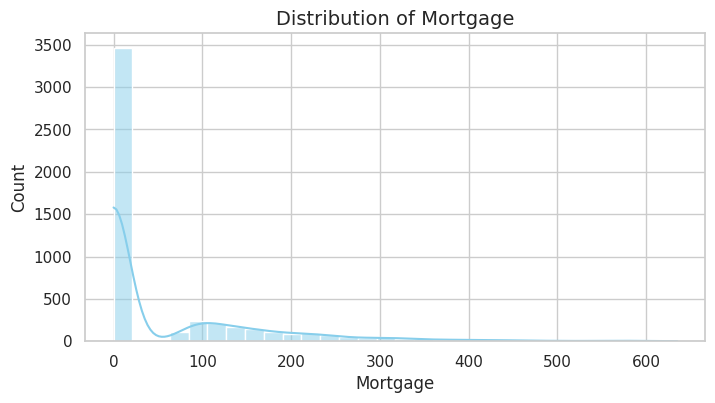

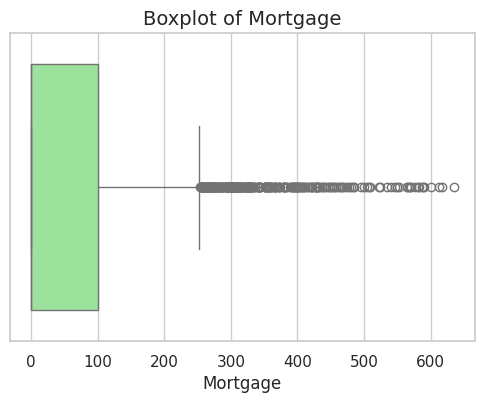

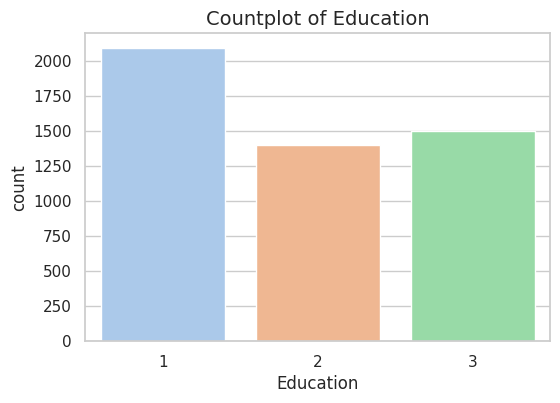

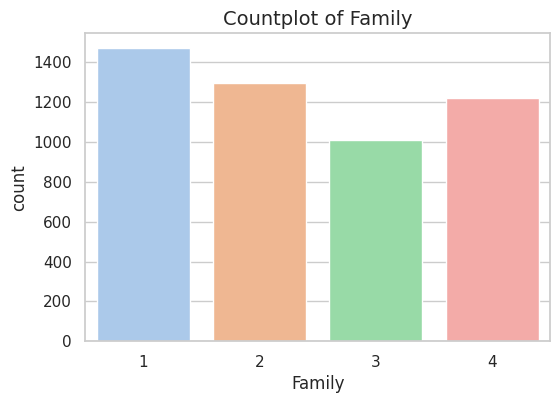

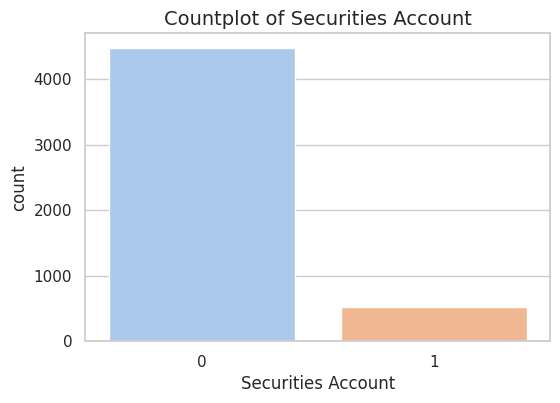

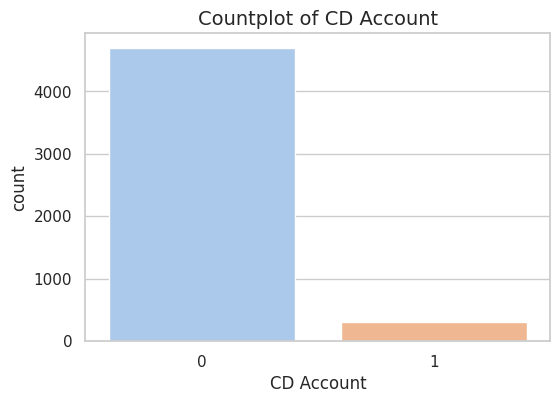

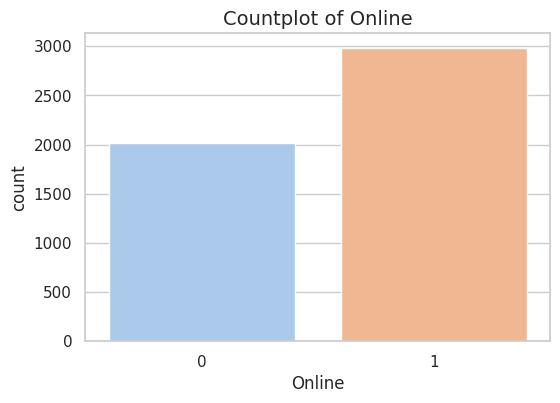

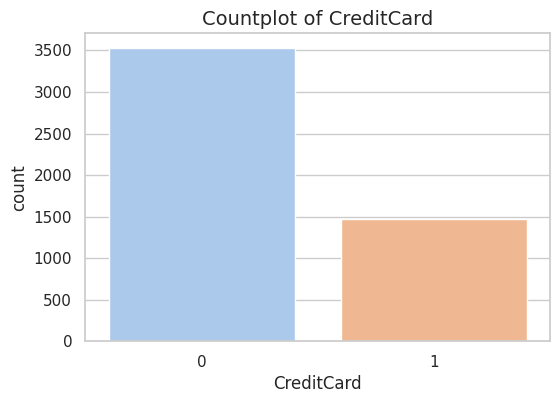

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical and categorical columns
num_cols = [ 'Experience', 'CCAvg', 'Mortgage']
cat_cols = ['Education', 'Family', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

# Set style
sns.set(style="whitegrid")

# Plot histograms for numerical columns
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.show()

# Plot countplots for categorical columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], palette="pastel")
    plt.title(f'Countplot of {col}', fontsize=14)
    plt.show()


In [28]:
df.dtypes


,0
Age,int64
Experience,float64
Income,int64
ZIP Code,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal Loan,int64
Securities Account,int64


In [29]:
num_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [35]:
print(df.isna().sum())


Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Income_bin            0
dtype: int64


#Bivariate Analysis

In [21]:
df.groupby('Personal Loan')['Income'].mean()


,Income
Personal Loan,
0,66.237389
1,144.745833


#Numerical Features vs Loan

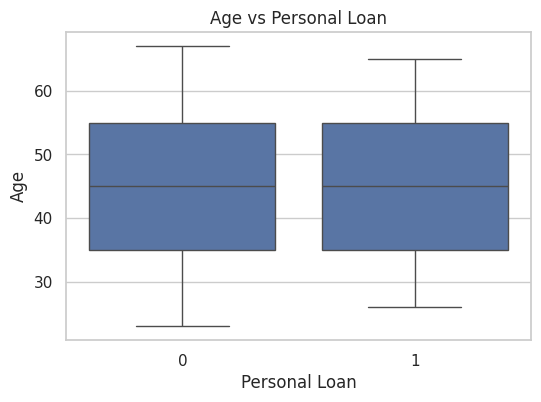

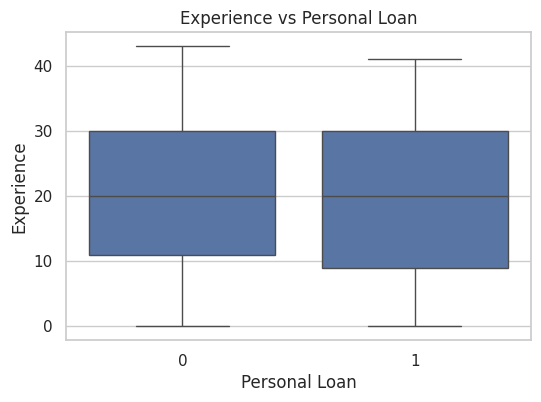

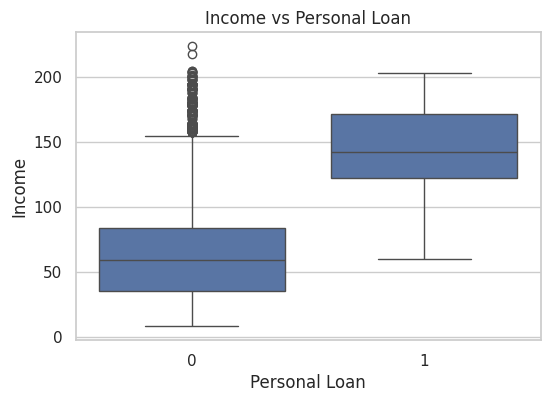

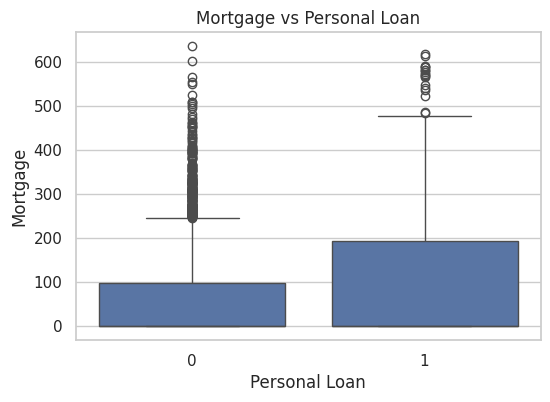

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["Age", "Experience", "Income", "Mortgage"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Personal Loan", y=col, data=df)
    plt.title(f"{col} vs Personal Loan")
    plt.show()


#Categorical Features vs Loan

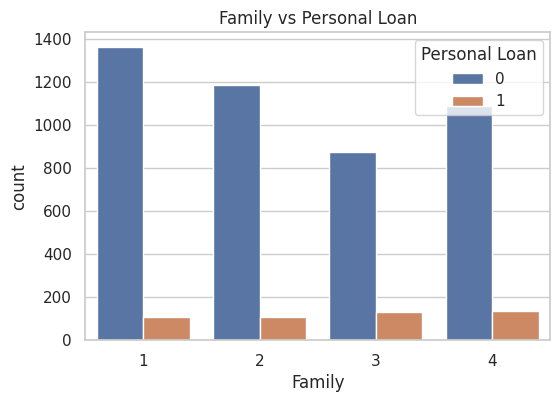

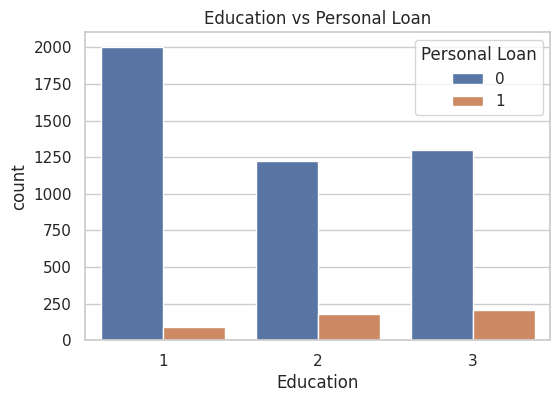

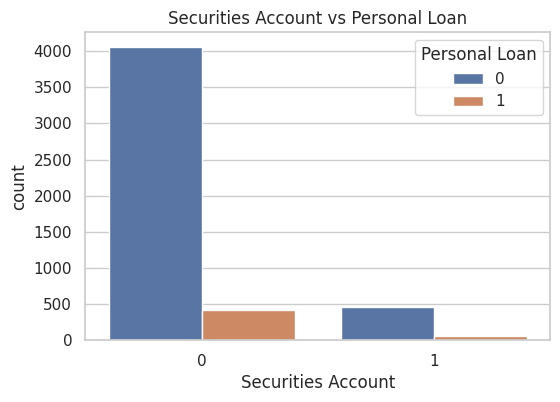

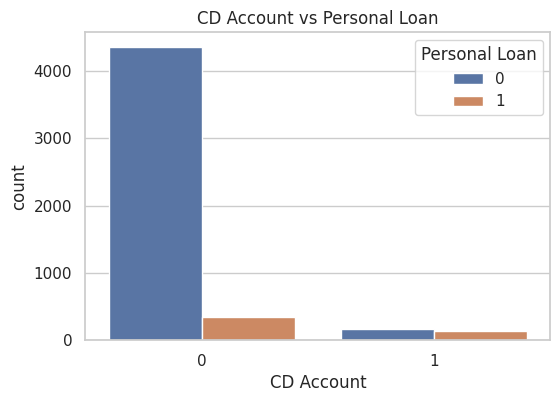

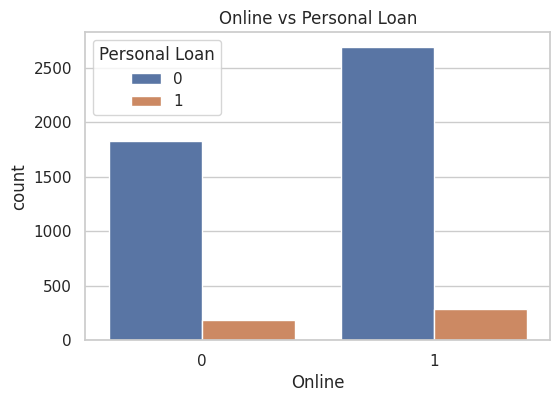

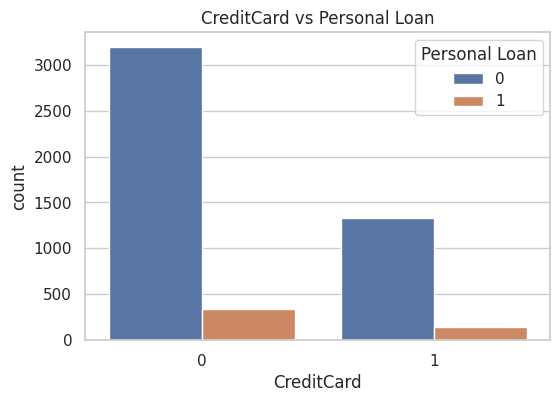

In [37]:
cat_cols = ["Family", "Education", "Securities Account", "CD Account", "Online", "CreditCard"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Personal Loan", data=df)
    plt.title(f"{col} vs Personal Loan")
    plt.show()


#Correlation Heatmaps

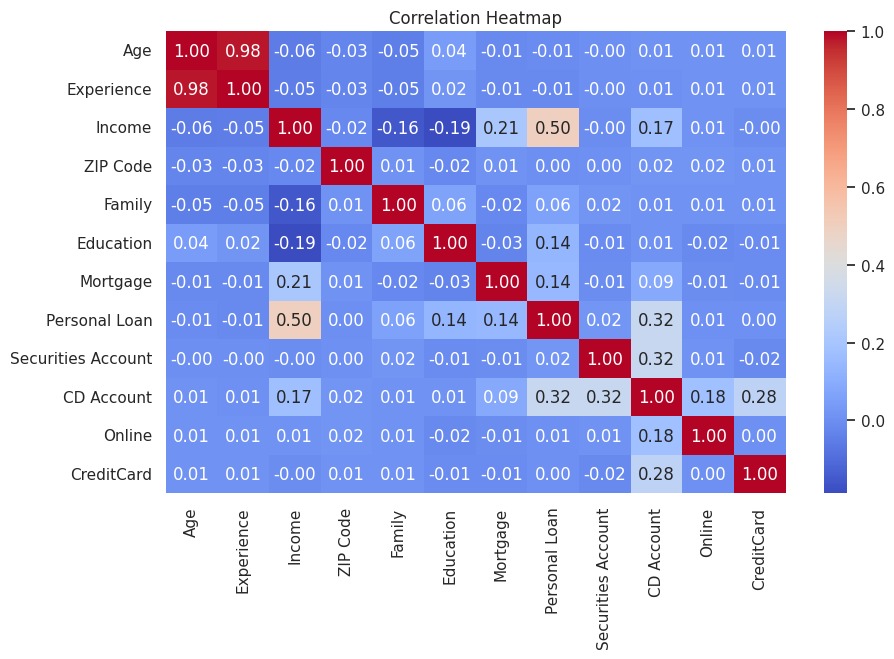

In [39]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [42]:
df.head()

,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_bin
0,25,1.0,49,91108,4,1,0,0,1,0,0,0,"(0, 50]"
1,45,19.0,34,90089,3,1,0,0,1,0,0,0,"(0, 50]"
2,39,15.0,11,94720,1,1,0,0,0,0,0,0,"(0, 50]"
3,35,9.0,100,94112,1,2,0,0,0,0,0,0,"(50, 100]"
4,35,8.0,45,91330,4,2,0,0,0,0,0,1,"(0, 50]"


In [45]:
# 1. Drop unnecessary columns
df_clean = df.drop(columns=['Experience', 'ZIP Code', 'Online', 'Securities Account'])

In [47]:
df_clean.head()

,Age,Income,Family,Education,Mortgage,Personal Loan,CD Account,CreditCard,Income_bin
0,25,49,4,1,0,0,0,0,"(0, 50]"
1,45,34,3,1,0,0,0,0,"(0, 50]"
2,39,11,1,1,0,0,0,0,"(0, 50]"
3,35,100,1,2,0,0,0,0,"(50, 100]"
4,35,45,4,2,0,0,0,1,"(0, 50]"


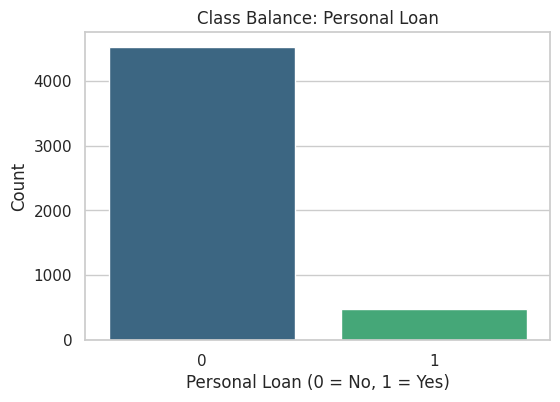

Class Counts:
 Personal Loan
0    4520
1     480
Name: count, dtype: int64

Class Percentages:
 Personal Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


In [48]:
# 1. Drop Income_bin (redundant column)
if "Income_bin" in df.columns:
    df.drop("Income_bin", axis=1, inplace=True)

# 2. Check class balance of target variable
plt.figure(figsize=(6,4))
sns.countplot(x="Personal Loan", data=df, palette="viridis")
plt.title("Class Balance: Personal Loan")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Print exact counts and percentages
class_counts = df["Personal Loan"].value_counts()
class_percentages = df["Personal Loan"].value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percentages)


#Handle Imbalances


In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import numpy as np

# Split data
X = df.drop("Personal Loan", axis=1)
y = df["Personal Loan"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Hyperparameter tuning
param_grid = {
    "max_depth": [4, 7],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 5, 10, 20]
}

clf = DecisionTreeClassifier(class_weight="balanced", random_state=42)
grid = GridSearchCV(clf, param_grid, scoring="f1", cv=5)
grid.fit(X_train, y_train)

best_clf = grid.best_estimator_
print("Best hyperparameters:", grid.best_params_)

# Get predicted probabilities for class 1
y_prob = best_clf.predict_proba(X_test)[:, 1]

# Find threshold that maximizes F1-score for class 1
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(y_test, (y_prob >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best threshold for class 1:", best_threshold)

# Make predictions using the best threshold
y_pred = (y_prob >= best_threshold).astype(int)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Best hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best threshold for class 1: 0.8599999999999995
Confusion Matrix:
 [[896   8]
 [ 10  86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.91      0.90      0.91        96

    accuracy                           0.98      1000
   macro avg       0.95      0.94      0.95      1000
weighted avg       0.98      0.98      0.98      1000

Accuracy: 0.982


#pruning the trees for better generalization

In [51]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score

depths = [3, 4, 5, 6, 7]  # possible max_depth values
results = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, class_weight="balanced", random_state=42)
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Use threshold = 0.5 (default) for simplicity
    y_pred = (y_prob >= 0.5).astype(int)

    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    results.append((d, f1, acc))

# Display results
for r in results:
    print(f"max_depth={r[0]}  |  F1-score(class1)={r[1]:.2f}  |  Accuracy={r[2]:.2f}")


max_depth=3  |  F1-score(class1)=0.77  |  Accuracy=0.94
max_depth=4  |  F1-score(class1)=0.78  |  Accuracy=0.95
max_depth=5  |  F1-score(class1)=0.75  |  Accuracy=0.94
max_depth=6  |  F1-score(class1)=0.77  |  Accuracy=0.94
max_depth=7  |  F1-score(class1)=0.78  |  Accuracy=0.95


In [53]:
import joblib

# Save the trained model
joblib.dump(best_clf, "decision_tree_model.pkl")
print("Model saved as 'decision_tree_model.pkl'")

# Later, load the model
loaded_model = joblib.load("decision_tree_model.pkl")
print("Model loaded successfully!")

# Test that it works
y_pred_loaded = loaded_model.predict(X_test)
print("Accuracy of loaded model:", accuracy_score(y_test, y_pred_loaded))


Model saved as 'decision_tree_model.pkl'
Model loaded successfully!
Accuracy of loaded model: 0.949
